# Visualización de datos con Matplotlib y Seaborn

## Introducción

Matplotlib es, probablemente, la libreria de visualización de datos mas popular. Es realmente efectiva a la hora de crear gráficos estáticos con pocas lineas de código y además son considerablemente personalizables, incluso tiene la capacidad de relizar gráficos tridimensionales o interactivos, aunque para estos hay librerías mejores.

Pese a ello, Matplotlib tiene dos ventajas o desventajas según la persona:

**La sencillez.** Ya hemos comentado que Matplotlib es efectivo para crear gráficos sencillos, pero una vez deseas que dejen de ser sencillos puede llegar a complicarse. Además, para muchos usuarios los gráficos que Matplotlib genera pueden ser poco estéticos.

**La sintaxis.** Como el propio nombre deja intuir (MATplotlib) la sintaxis que sigue la librería es parecida a la sintaxis que sigue el popular programa MATLAB. Para aquellos usuarios acostumbrados a este programa esto puede ser una ventaja porque ya estan hechos a dicha sintaxis. Pero incluso estas personas son conscientes que la sintaxis de MATLAB no es precisamente la mas cómoda.

Para  Michael Waskom estos dos puntos claramente eran una desventaja por lo que decidió crear Seaborn.

Seabron es un paquete de python programado encima de Matplotlib que tiene como objetivo solucionar los dos problemas descritos anteriormente.

Veamos una comparativa rápida:

In [1]:
#Importamos dependencias
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Generamos unos datos aleatorios
x = np.arange(0,10,0.1)
y = np.random.rand(100, 1)

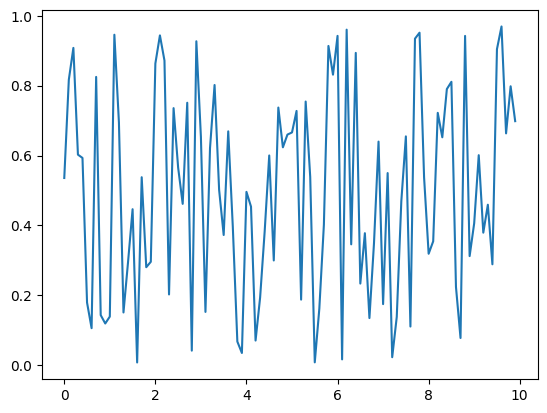

In [3]:
#Realizamos la gráfica con matplotlib
plt.plot(x, y)

<Axes: >

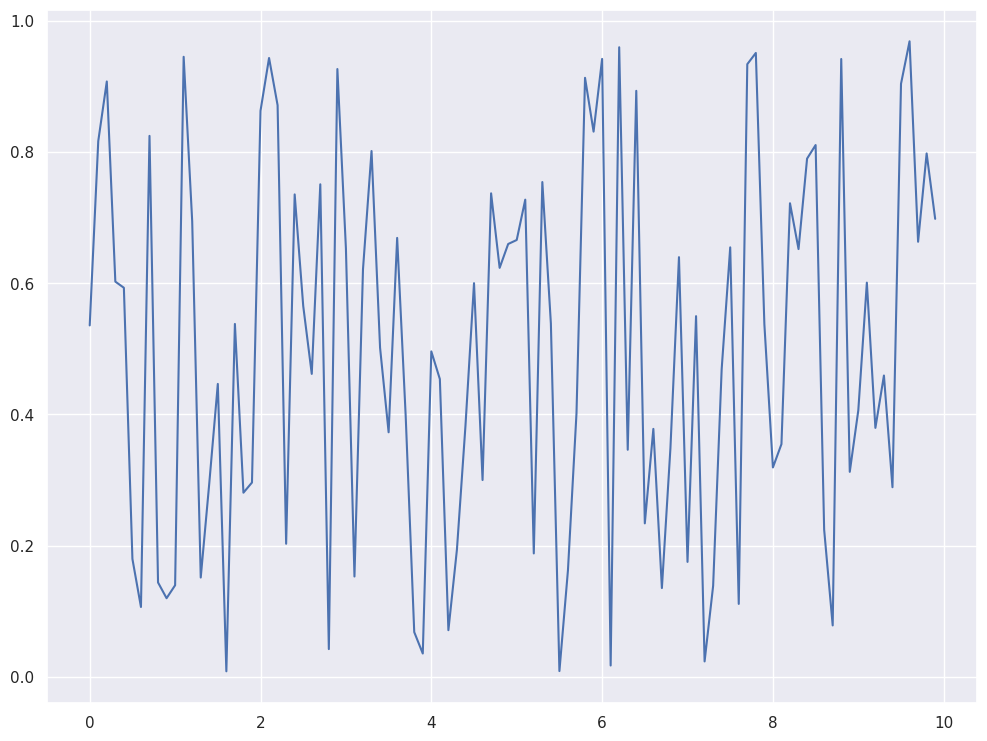

In [4]:
sns.set_theme()
sns.set(rc={'figure.figsize':(12,9)})


sns.lineplot(x=x,y=y.flatten())

Podemos ver que el gráfico de Seaborn tiene algo más de encanto visual, pero hemos encontrado un inconventiente. Seaborn no se entiende bien con numpy, al menos no tanto como matplotlib. Por tanto, hemos tenido que aplicar un método flatten() al array generado por numpy.

Por otro lado, seaborn es más capaz a la hora de trabajar con datasets de pandas.

Algo sorpendente es que si ahora realizamos el mismo gráfico mediante matplotlib el estilo que se mantiene es el de seaborn.

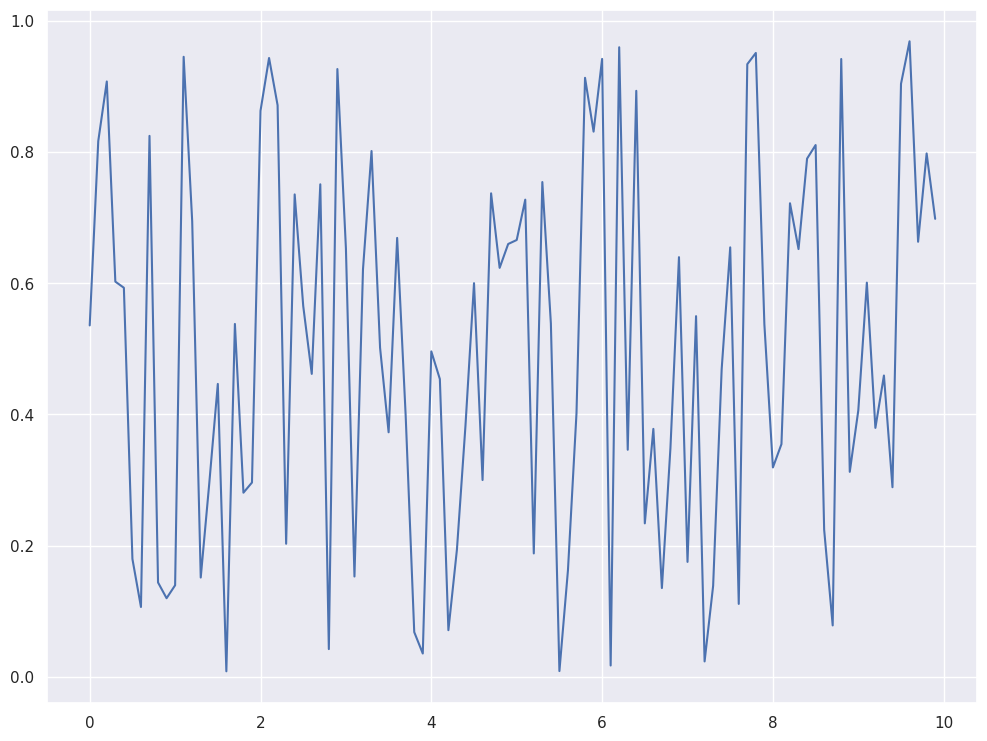

In [5]:
plt.plot(x, y)

Esto se debe a que estan altamente integrados y una vez definimos el tema con sns.set_theme() este prevalece.

Como norma general utilizaremos seaborn para las visualizaciones a lo largo de esta práctica y ciertas funcionalidades de matplotlib que no estan implementadas en seaborn.

Pese a resultar tedioso es importante saber manejarse con ambas herramientas.


## Contexto y Data Cleaning

Pese a que realizar gráficas de por si es una actividad realmente divertida, hacerlo con un objetivo es más entretenido incluso. Por ello vamos a trabajar sobre el siguiente dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

Recomendamos entrar a la documentación para al menos familiarizarse con la idea que representa cada columna.

Comencemos cargando los datos y veamos una muestra:


In [6]:
df = pd.read_csv('https://drive.google.com/u/0/uc?id=18ojsdAxC3HqFNZ9HQUmP8W02SXE8NhtU&export=download', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


No utilizaremos todas las columnas, por lo que vamos a realizar una selección de las más interesantes basándonos en la documentación:

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Ejercicio 0
Filtra el dataframe df por las siguiente columnas: `'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases'`

In [8]:
#Inserta Aquí tu código
df= df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
        'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,5524,1957,Graduation,Single,58138.0,0,0,635,88,546,172,88,88,3,8,10,4
1,2174,1954,Graduation,Single,46344.0,1,1,11,1,6,2,1,6,2,1,1,2
2,4141,1965,Graduation,Together,71613.0,0,0,426,49,127,111,21,42,1,8,2,10
3,6182,1984,Graduation,Together,26646.0,1,0,11,4,20,10,3,5,2,2,0,4
4,5324,1981,PhD,Married,58293.0,1,0,173,43,118,46,27,15,5,5,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,709,43,182,42,118,247,2,9,3,4
2236,4001,1946,PhD,Together,64014.0,2,1,406,0,30,0,0,8,7,8,2,5
2237,7270,1981,Graduation,Divorced,56981.0,0,0,908,48,217,32,12,24,1,2,3,13
2238,8235,1956,Master,Together,69245.0,0,1,428,30,214,80,30,61,2,6,5,10


Eliminamos valores atípicos y extremos

In [9]:
Q1 = df.quantile(0.15)
Q3 = df.quantile(0.85)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-9-26336baab3eb>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.15)
<ipython-input-9-26336baab3eb>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.85)
<ipython-input-9-26336baab3eb>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [10]:
df=df[~df["Marital_Status"].isin(["YOLO","Alone","Absurd"])]

Ahora que ya tenemos nuestro conjunto de datos preparado estamos casi listos.

## Tipos de gráficos


Tipos de gráficos hay decenas, si no cientos o miles, en cualquier caso, muchos. Hacer una selección de los mas importantes no es sencillo y el orden en el cual explicarlos tampoco. Para mantener cierta coherencia en esta práctica hemos optado por separar los gráficos según su objetivo ya que es una forma común de hacerlo y que nos permitirá, en un futuro, ayudar en la selección de que gráfico es el adecuado.

Como guía orientativa ofrecemos la siguiente imagen:
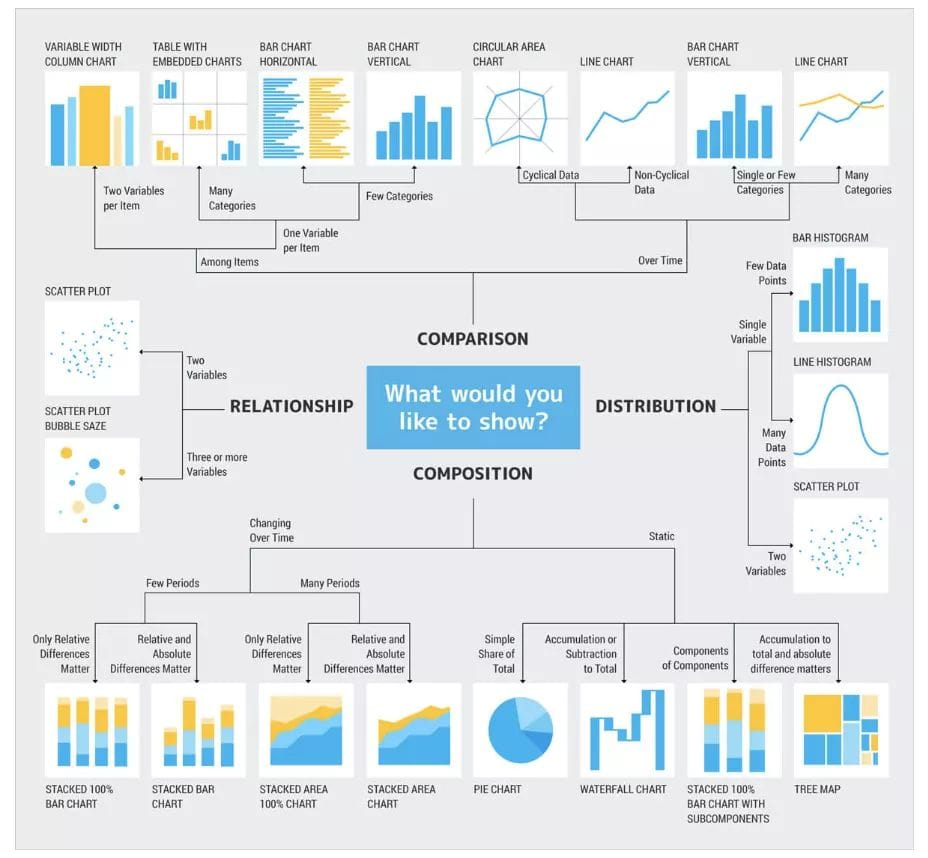

Para ser totalmente sinceros no hay norma alguna que dicte que gráfico debe relizarse en cada caso, es posible que podamos obtener la información que deseamos de dos gráficos distintos. Aquí entra en juego también la capacidad creativa de cada persona.

## Gráficos para correlaciones.

Dentro de los gráficos utilizados para mostrar una correlación entre variables destacaríamos el scatter plot (gráfico de puntos). En la imagen anterior también muestra el Bubble plot pero este no deja de ser un scatter plot como veremos a continuación.

### Scatter plot

Los Scatter plots son efectivos cuando al menos una variable es cuantitativa. La otra podría ser cualitativa. La sintaxis del scatterplot es sencilla:
`sns.scatterplot(data = #dataframe, x= #columna_del_df, y=#columna_del_df)`

Indicaremos con un # los campos a rellenar y como nombre una indicación.

De no estar trabajando con un dataframe también podemos hacer un scatterplot con el código:
`sns.scatterplot(x=#lista, y=#lista)`

Nuestros gráficos deben tener un objetivo, en este caso va a ser responder a la siguiente pregunta: ¿Las personas con más ingresos compran mas fruta?

<Axes: xlabel='Income', ylabel='MntFruits'>

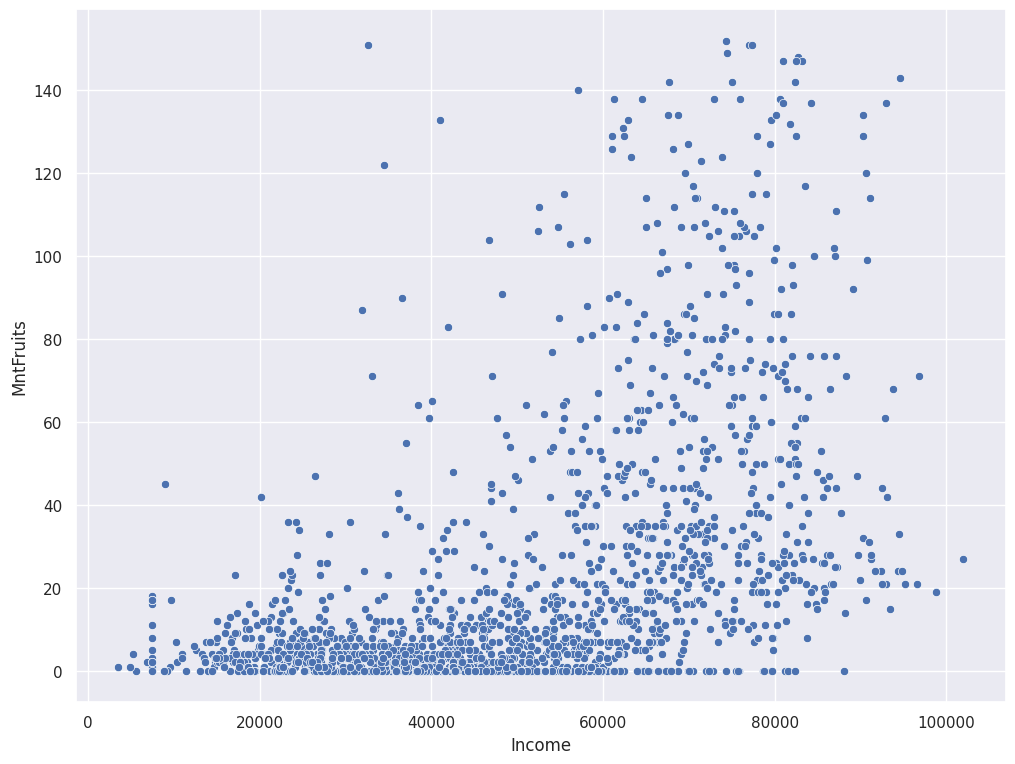

In [11]:
sns.scatterplot(data = df, x="Income" , y="MntFruits")

Visto el gráficopodemos observar una tendecia suave en la cantidad máxima de fruta que se compra, la dispersión de los datos aumenta con los ingresos. Pese a ello no parece ser que exista una relación extremadamente clara, sería complicado predecir la cantidad de fruta que alguien comprará en función a sus ingresos.

En este caso hemos hecho un gráfico donde buscamos una relación entre dos variables continuas.

Intentemos contestar a otra pregunta: ¿Las personas con más educación compra mas fruta?

<Axes: xlabel='Education', ylabel='MntFruits'>

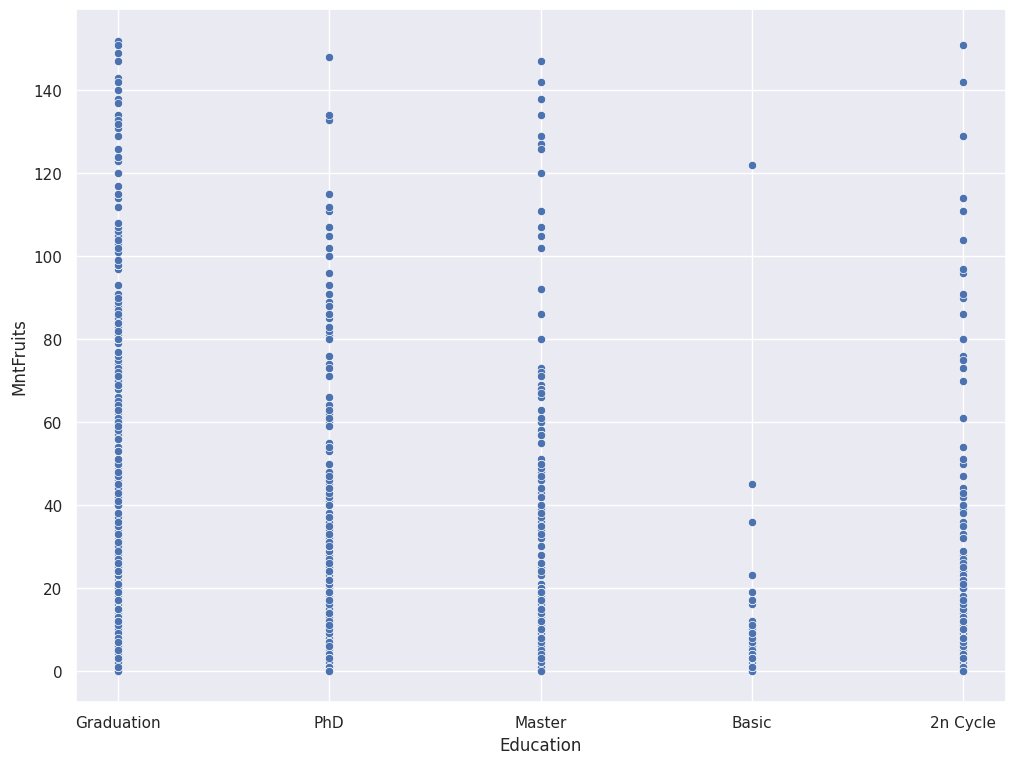

In [12]:
sns.scatterplot(data = df, x="Education" , y="MntFruits")

Pese a que el gráfico anterior aporta cierta información de como se distribuyen los puntos no sobre la cantidad de puntos ya que se superponen. Por ello existe el gráfico `stripplot`

<Axes: xlabel='Education', ylabel='MntFruits'>

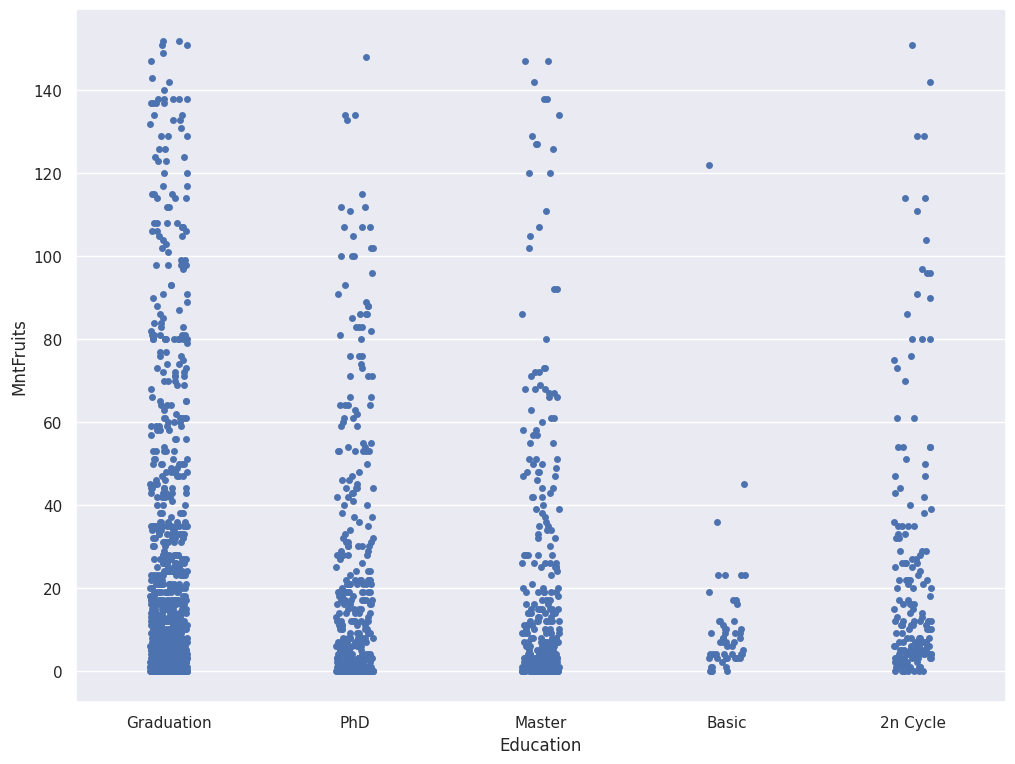

In [13]:
sns.stripplot(data = df, x="Education" , y="MntFruits")

En este caso hemos realizado el scatterplot (y stripplot) entre una variable cuantitativa y otra cualitativa. Parece ser que una vez superas la educación básica ya eres capaz de saber la importancia de la fruta y adquieres más.

Pese a que los gráficos anteriores son un buen primer paso, son algo sencillos, así que vamos a explorar dos propiedades del scatter plot : `hue` y `size`.


*   `hue`. Este parámetro nos permite asociar colores a categorías.
*   `size`. Este parámetro nos permite asociar tamaños a categorías.

Veamoslos en acción:

<Axes: xlabel='Income', ylabel='MntFruits'>

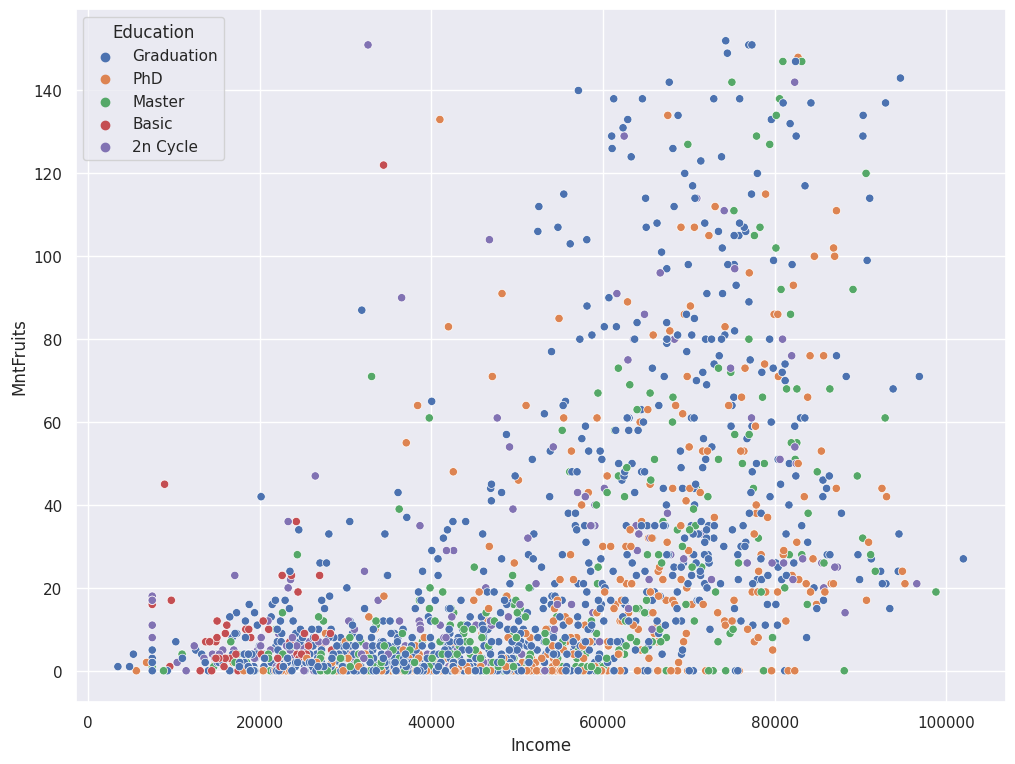

In [14]:
sns.scatterplot(data = df, x="Income" , y="MntFruits", hue = "Education")

En el gráfico anterior hemos combinado los dos anteriores, y gracias a esto podemos obtener nuevos puntos de vista. Parece ser que las personas con una educación básica tienen menos ingresos y quizás por ello la cantidad de fruta que compran es menor, no es un tema de educación.
Practiquemos un poco:

#### Ejercicio 1

**Realiza una gráfico que te permita contestar a la siguiente pregunta: ¿Existe una relación entre los ingresos y la compra de vino? Explica los resultados**

<Axes: xlabel='Income', ylabel='MntWines'>

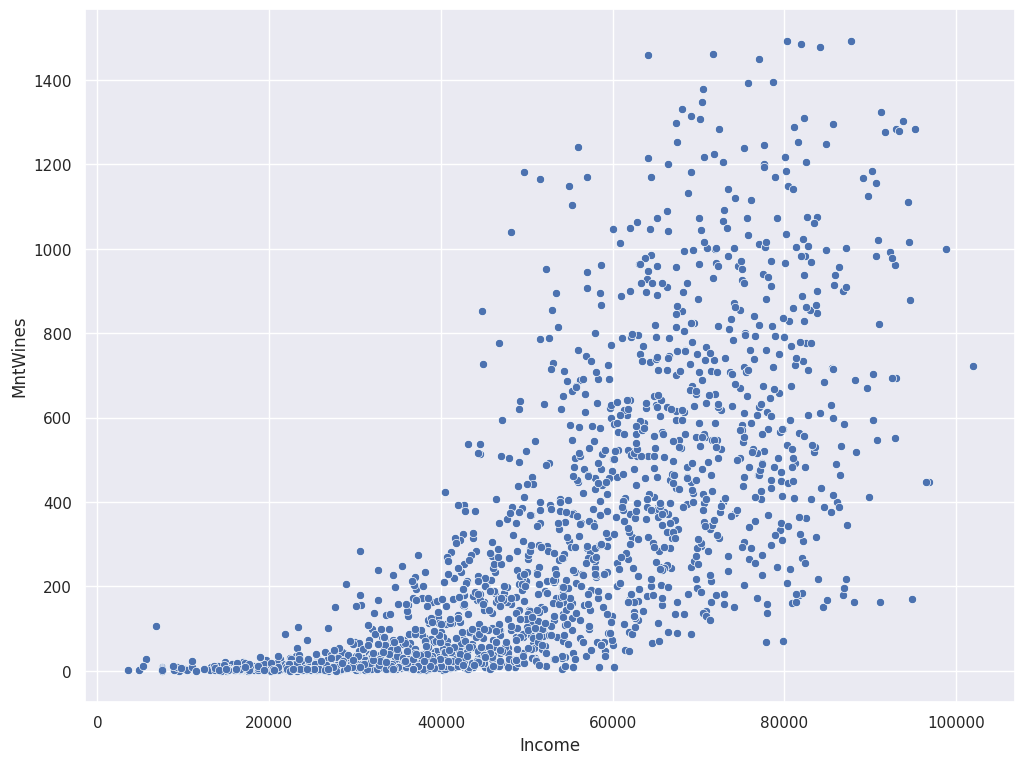

In [16]:
#INSERTA AQUÍ TU CÓDIGO
sns.scatterplot(data = df, x="Income" , y="MntWines")

*Inserta aquí tu explicación*

**¿Crees que existen otros factores que influyen en la compra de vino aparte de los ingresos? Realiza un gráfico donde los atributos hue y size sean eduación y número de niños.**

<Axes: xlabel='Income', ylabel='MntWines'>

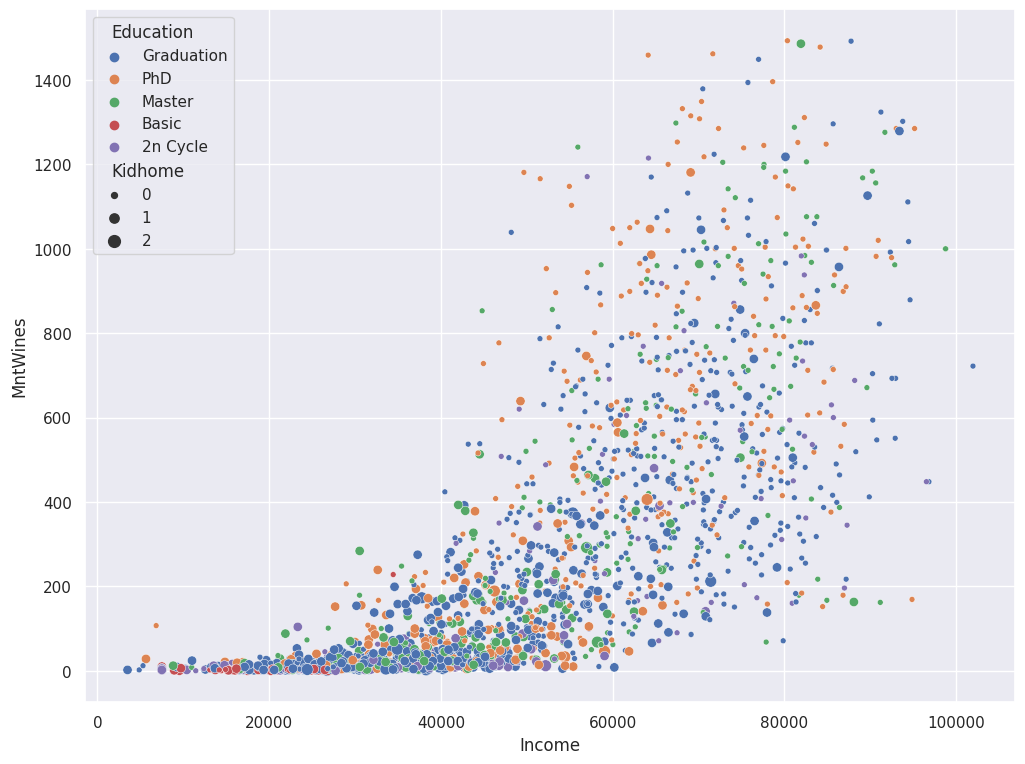

In [18]:
#INSERTA AQUÍ TU CÓDIGO
sns.scatterplot(data = df, x="Income" , y="MntWines", hue='Education', size = 'Kidhome')

**Si nos fijamos en el gráfico anterior parece ser que existe una relación el número de hijos y los ingresos. Haz una gráfica que muestre esta relación y colorealo en función de la eduación.**

<Axes: xlabel='Kidhome', ylabel='Income'>

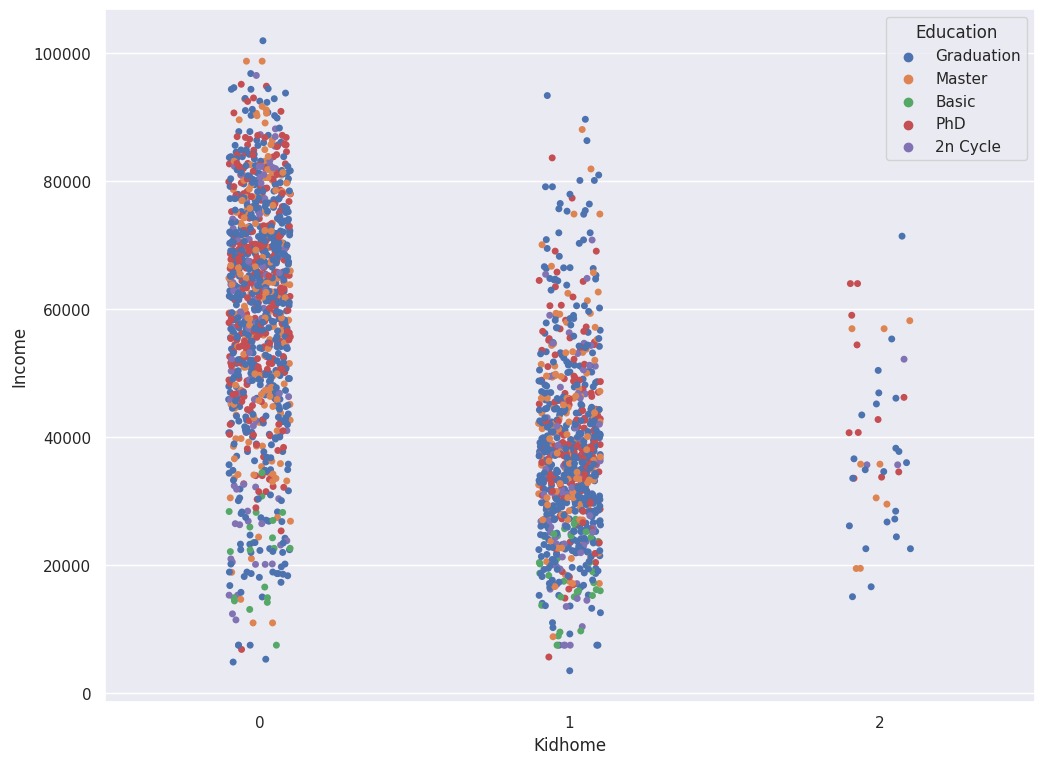

In [21]:
#INSERTA AQUÍ TU CÓDIGO
sns.stripplot(data = df, x="Kidhome" , y="Income", hue="Education")

## Añadiendo títulos

Ahora que ya sabemos como realizar un gráfico, nos parece un buen momento para hacer un inciso para explicar como añadir un título al gráfico y a los ejes. Tomemos por ejemplo el útlimo gráfico generado:

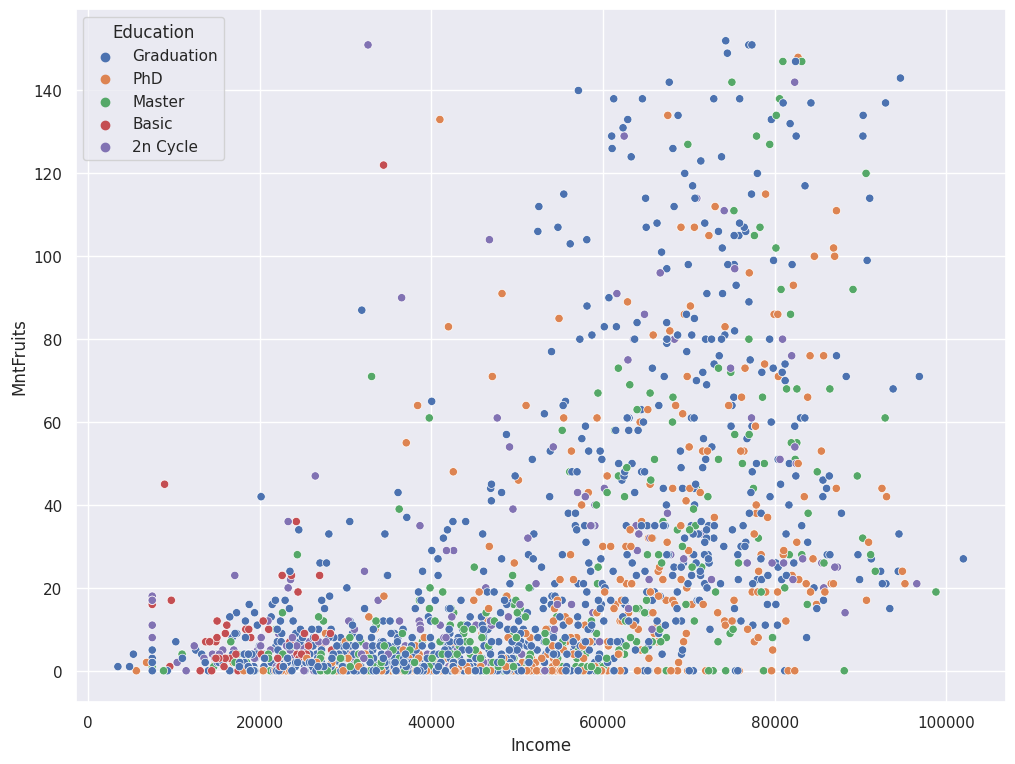

In [22]:
fig=sns.scatterplot(data = df, x="Income" , y="MntFruits", hue = "Education")

Guardar la gráfica como `fig` nos permite aplical los siguientes atributos:


*   `.set_xlabel` o ` .set_ylabel`  para poner un título a los ejes.
*   `.set_title` para poner un título al gráfico.
* `.figure` para volver a mostrar el gáfico.

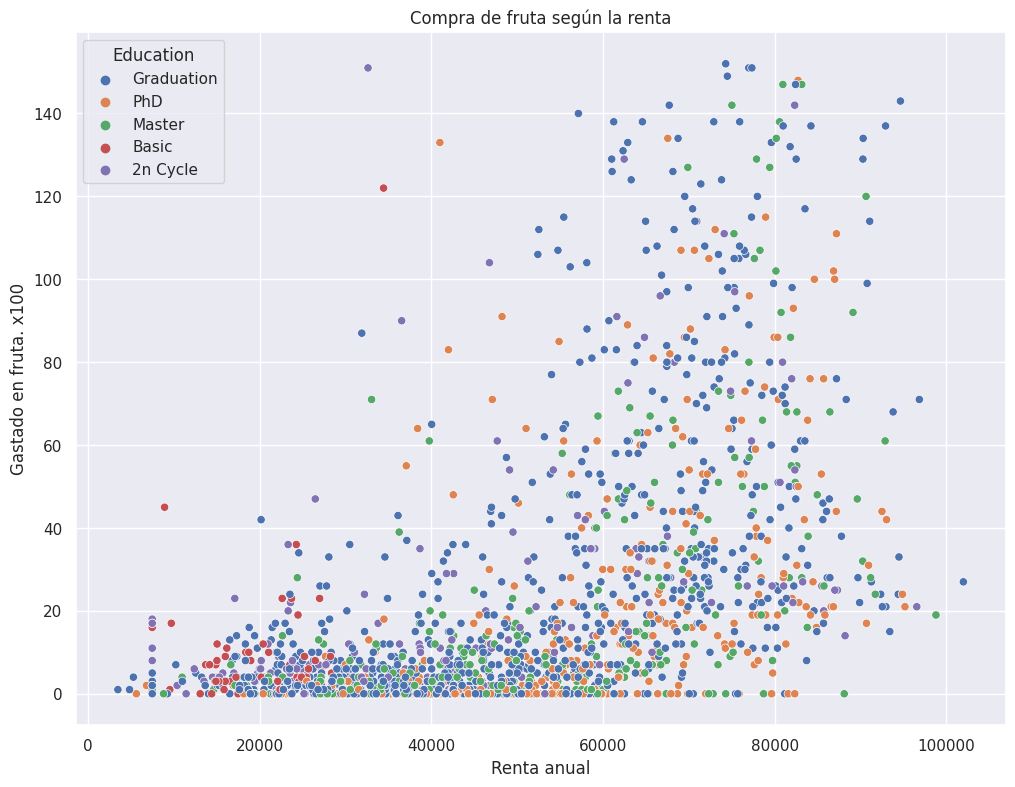

In [23]:
fig.set_title("Compra de fruta según la renta")
fig.set_xlabel("Renta anual")
fig.set_ylabel("Gastado en fruta. x100")
fig.figure

#### Ejercicio 2

Toma el útlimo gráfico de puntos creado en el ejercicio 1, vuelvelo a crear y añade título y nombre a los dos ejes.

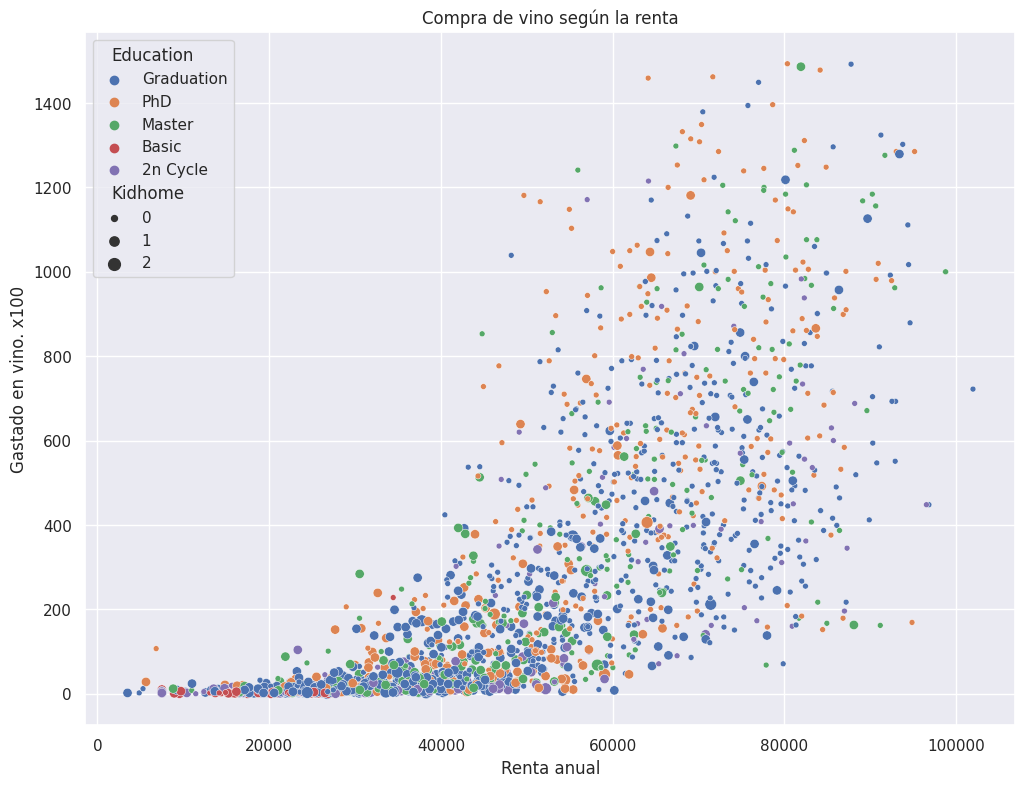

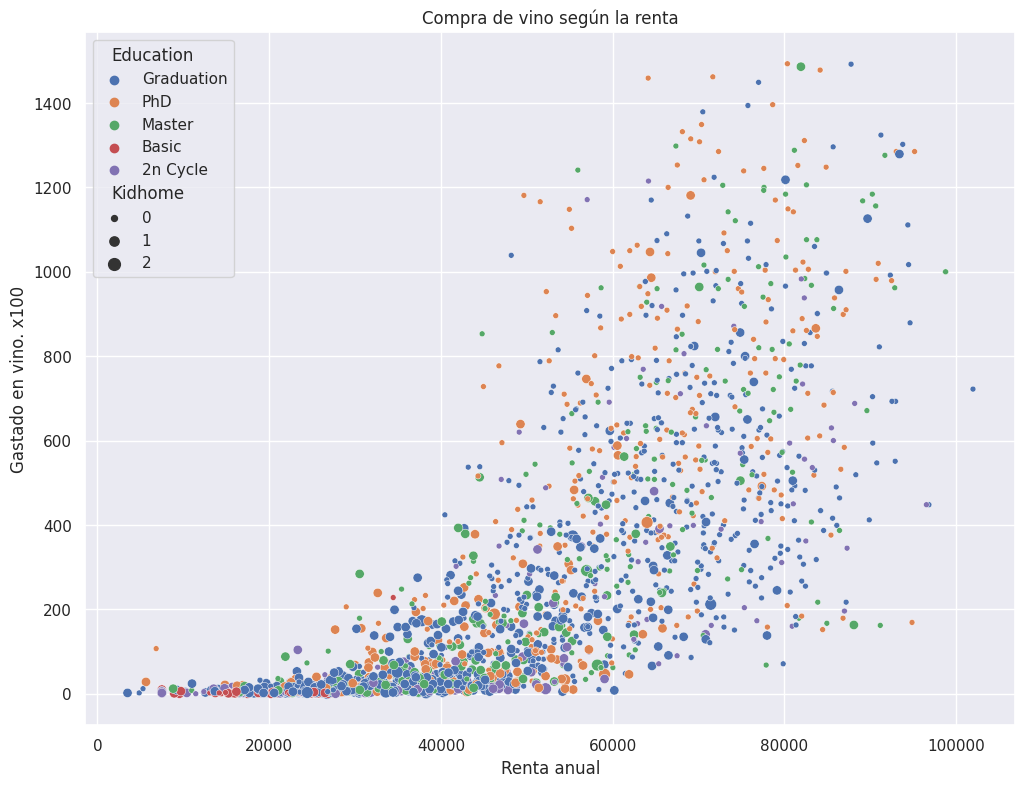

In [24]:
#INSERTA AQUÍ TU CÓDIGO
fig = sns.scatterplot(data = df, x="Income" , y="MntWines", hue='Education', size = 'Kidhome')
fig.set_title("Compra de vino según la renta")
fig.set_xlabel("Renta anual")
fig.set_ylabel("Gastado en vino. x100")
fig.figure


## Gráficos para distribuciones.

Estos gráficos se utilizan para visualizar la distribución que siguen los datos. Para aquel que no tenga conocimiento de estadística, se podría decir que son útiles para "contar".

### Histograma

El histograma es un gráfico de barras para variables continuas. El histograma divide el intervalo en el que la variable toma valores en subintervalos y cuenta cuantos datos hay en cada subintervalo. Se podría decir que discretiza la variable continua.

Vamos a ver que distribución siguen los ingresos de los clientes:

Text(0.5, 1.0, 'Distribución de las rentas de los clientes')

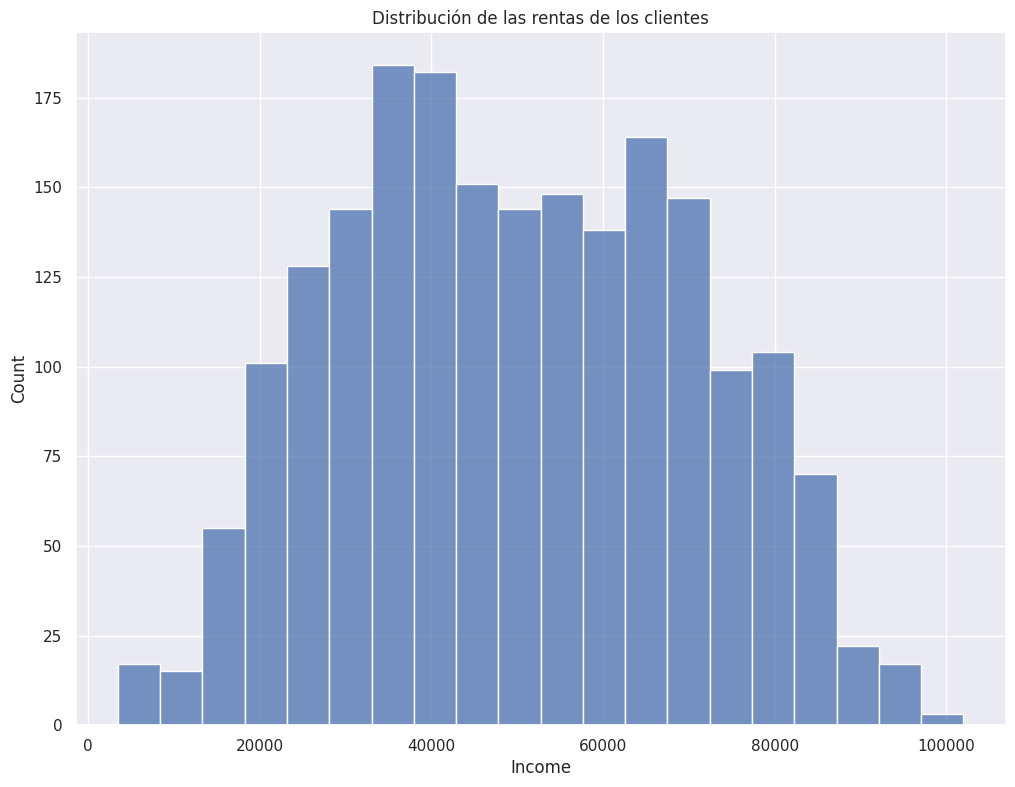

In [25]:
fig=sns.histplot(data = df, x="Income")
fig.set_title("Distribución de las rentas de los clientes")

El histograma anterior nos permite ver que la mayoría de clientes tienen sobre los 40000 dolares anuales de ingreso, pero si nos fijamos no podemos saber muy bien en que intervalo estan los datos. La funcion histplot pone el borde de la primera barra en el primer valor y el ancho de las barras no es un valor exacto. Podemos forzar estos parámetros para poder tener un histograma más cuadrado.

<Axes: xlabel='Income', ylabel='Count'>

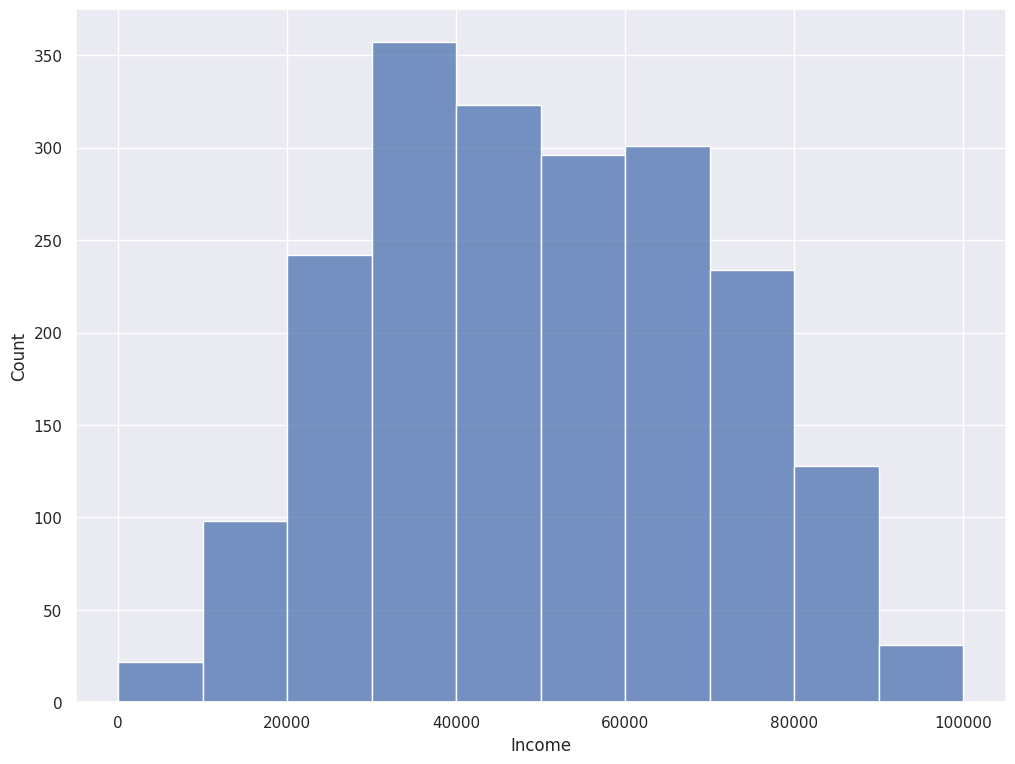

In [26]:
sns.histplot(data = df, x="Income", binrange=(0,100000), binwidth=10000)

Este histograma resulta algo mas sencillo de leer, sabemos donde empieza y donde acaba cada intervalo gracias a los parámetros `binrange` y `binwidth`.
*   `binrange` indica el intervalo en el que se realiza el histograma. Podemos incluso cortarlo y mostrar una parte de los datos.
*   `binwidth` indica el ancho del intervalo, en este caso 100000.

Otro parámetro interesante es `bins` que nos permite indicar de forma exacta el número de barras, por ejemplo:

<Axes: xlabel='Income', ylabel='Count'>

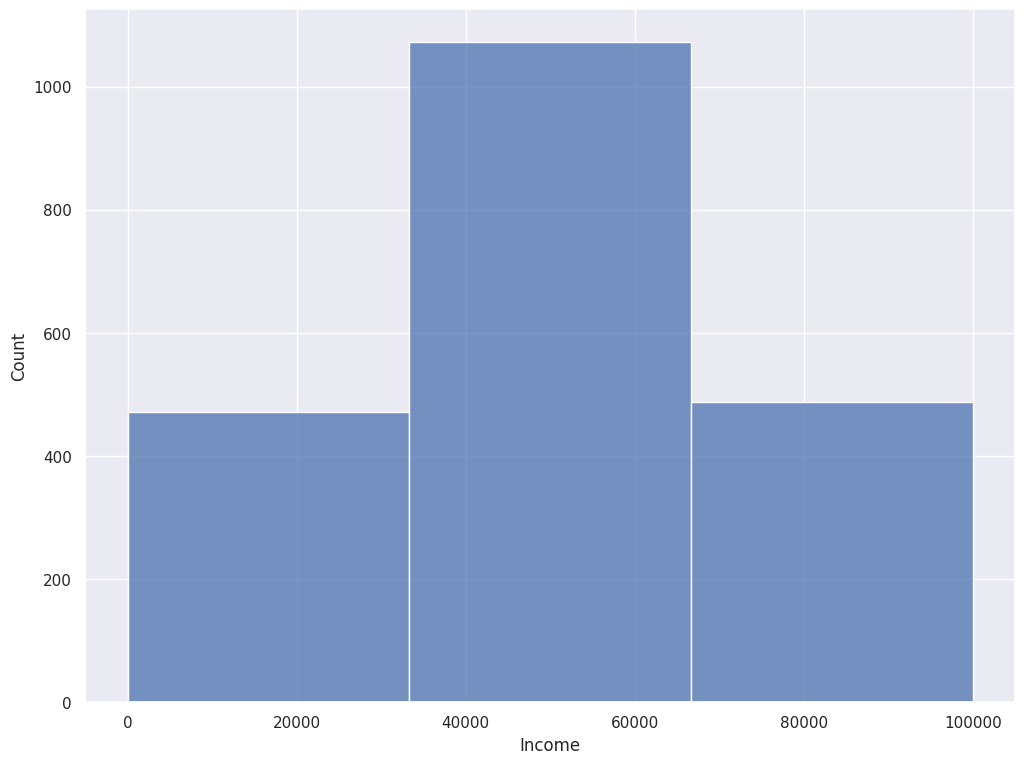

In [27]:
sns.histplot(data = df, x="Income", binrange=(0,100000), bins=3)

Así por ejemplo podemos dividir los ingresos en 3 intervalos: bajos, medios y altos.

Al igual que en los anteriores podemos aplicar colores en función de la categoría. Veamoslo:

<Axes: xlabel='Income', ylabel='Count'>

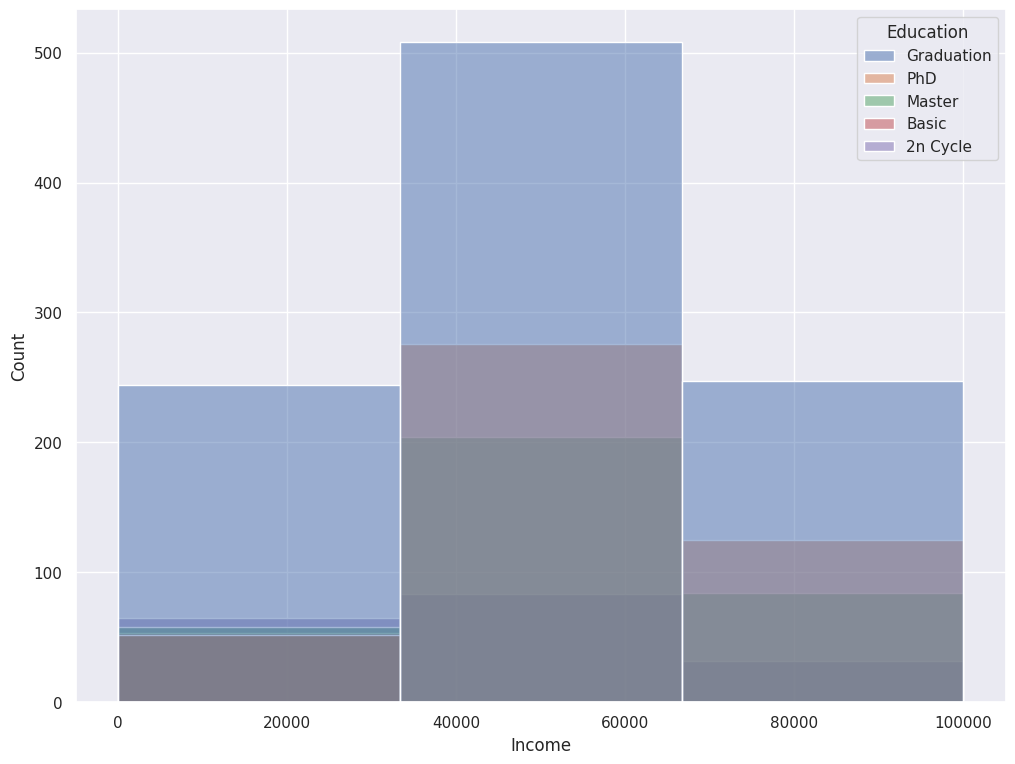

In [28]:
sns.histplot(data = df, x="Income", binrange=(0,100000), bins=3, hue="Education")

En este caso el efecto de barras superpuestas no es precisamente el adecuado ya que por el número de categorías no llega a verse del todo. Por tanto vamos a añadir un nuevo parámetro:

<Axes: xlabel='Income', ylabel='Count'>

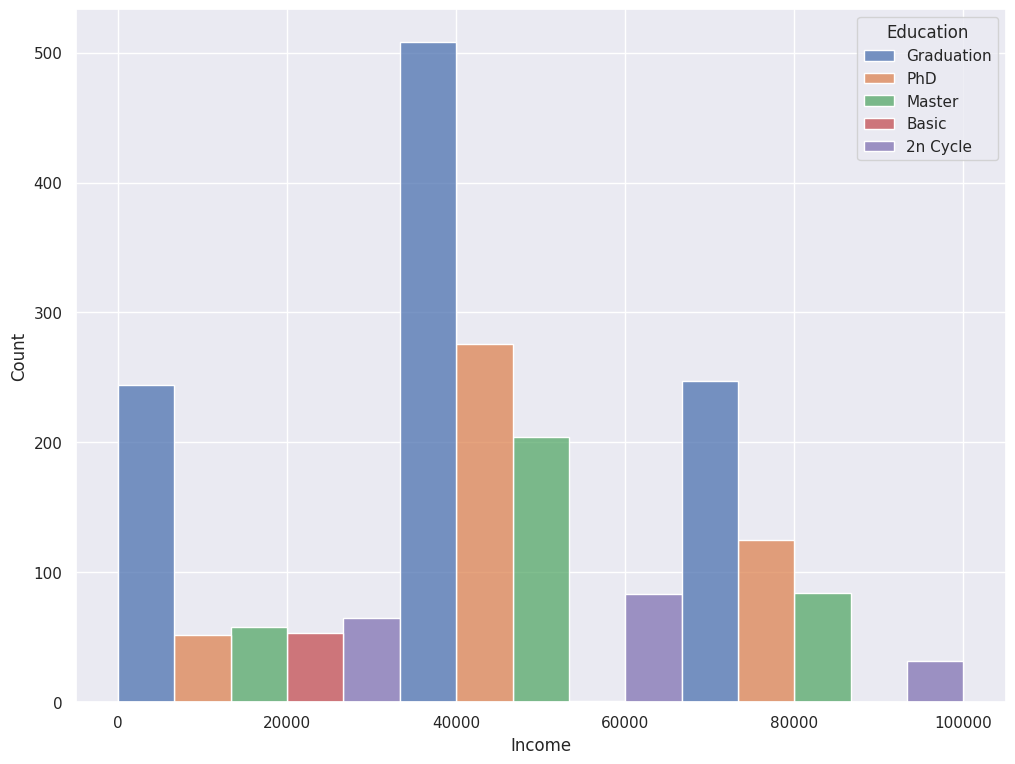

In [29]:
sns.histplot(data = df, x="Income", binrange=(0,100000), bins=3,multiple="dodge", hue="Education")

En este caso hay que recordar que pese a tener un número de barras considerables, estamos trabajando en 3 bloques. La primera barra azúl parece que tenga en cuenta sueldos entre 0 y 6000 pero no es así, es entre 0 y 33333, al igual que todas las siguientes hasta la segunda barra azul.

#### Ejercicio 3

**Realiza un histograma para ver la distribución de la venta de vino**

<Axes: xlabel='MntWines', ylabel='Count'>

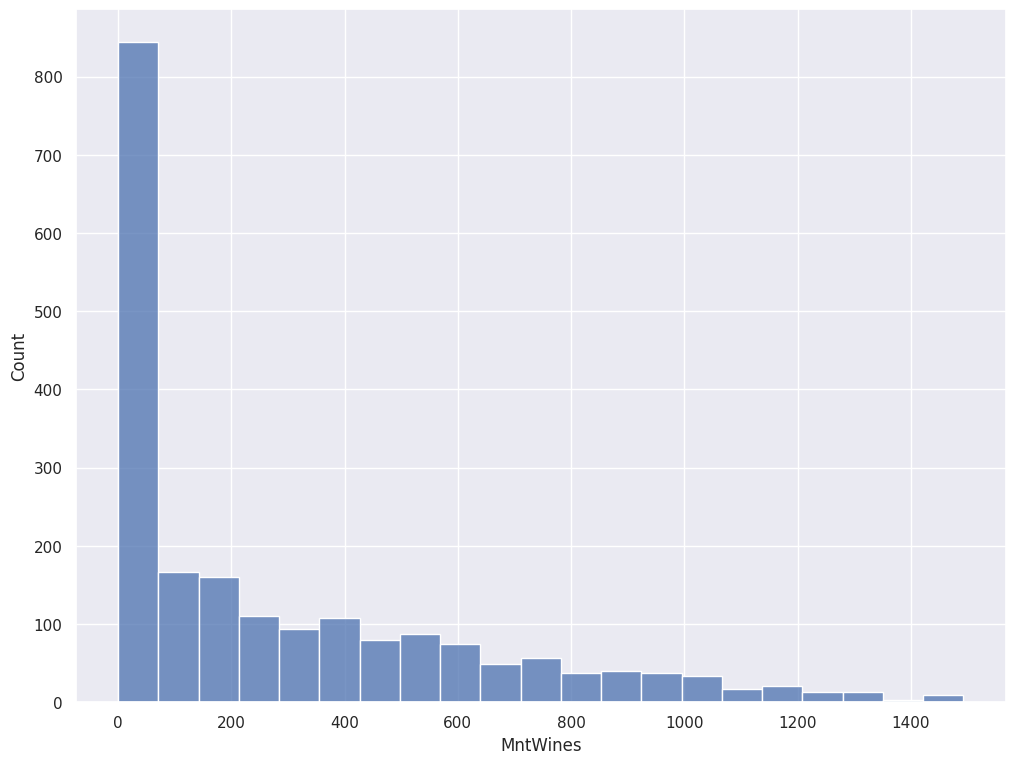

In [33]:
#INSERTA AQUÍ TU CÓDIGO
sns.histplot(data = df, x="MntWines")

**Vamos a intentar contestar a las siguientes preguntas: ¿Cuanto se gastan en vino los usuarios normalmente (valor mas común)? ¿Afecta el número de jovenes en casa en la compra de vino? ¿Y el número de hijos pequeños?**



**Realiza un histograma donde el color depende del número de jovenes en casa. (`Teenhome`). Prueba dar los valores `stack`, `layer`,`dodge` y `fill` al parámetro `multiple`. Repite el proceso para `Kidhome`. Comenta los resultados detenidamente.**

**Alguno de los gráficos anteriores te ayuda a contestar la siguiente pregunta:**
**¿De las personas que más gastan en vinos,en porcentaje, cuántos no tienen hijos?**

**Prueba ahora a eliminar el parámetro `multiple` y a dar valores `step`, `bars` y `poly` al parámetro `element`.**

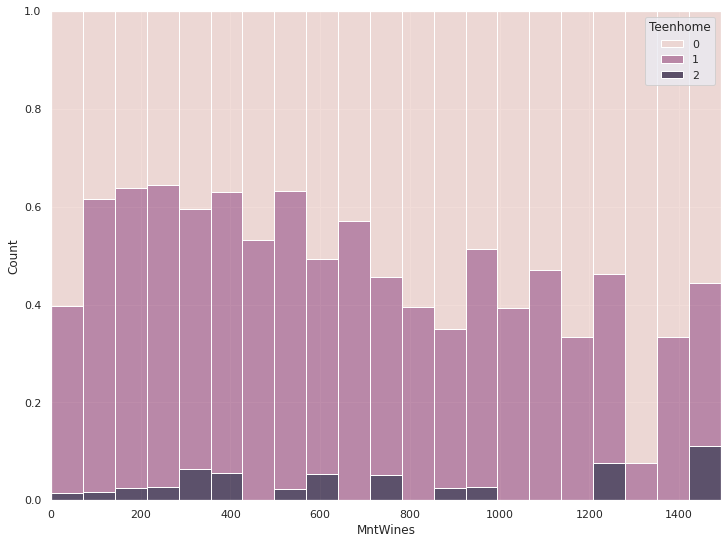

In [ ]:
#INSERTA AQUÍ TU CÓDIGO


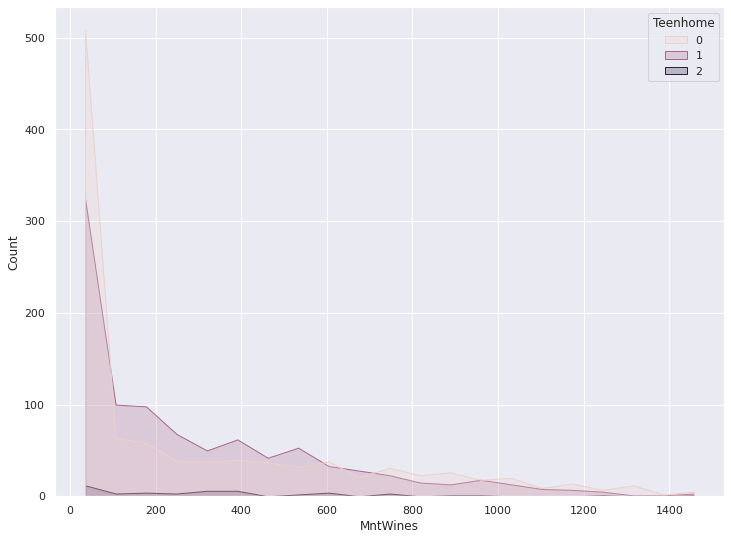

In [ ]:
#INSERTA AQUÍ TU CÓDIGO


### Line Histogram o (KDE)

KDE son las siglas de kernel density estimate, dicho de forma sencilla, una estimación de la función densidad que siguen los datos. El valor estadistíco de la función densidad es enorme y complejo, pero como resumen cuanto mayor es el valor de la densidad para un punto, más común es el ùnto. Se podría decir que es similar a la gráfica que obtenemos al añadir el parámetro `element = 'poly'` en un histograma, solo que en este caso se aplican diferentes métodos estadísticos para el cálculo de la curva.

<Axes: xlabel='MntWines', ylabel='Density'>

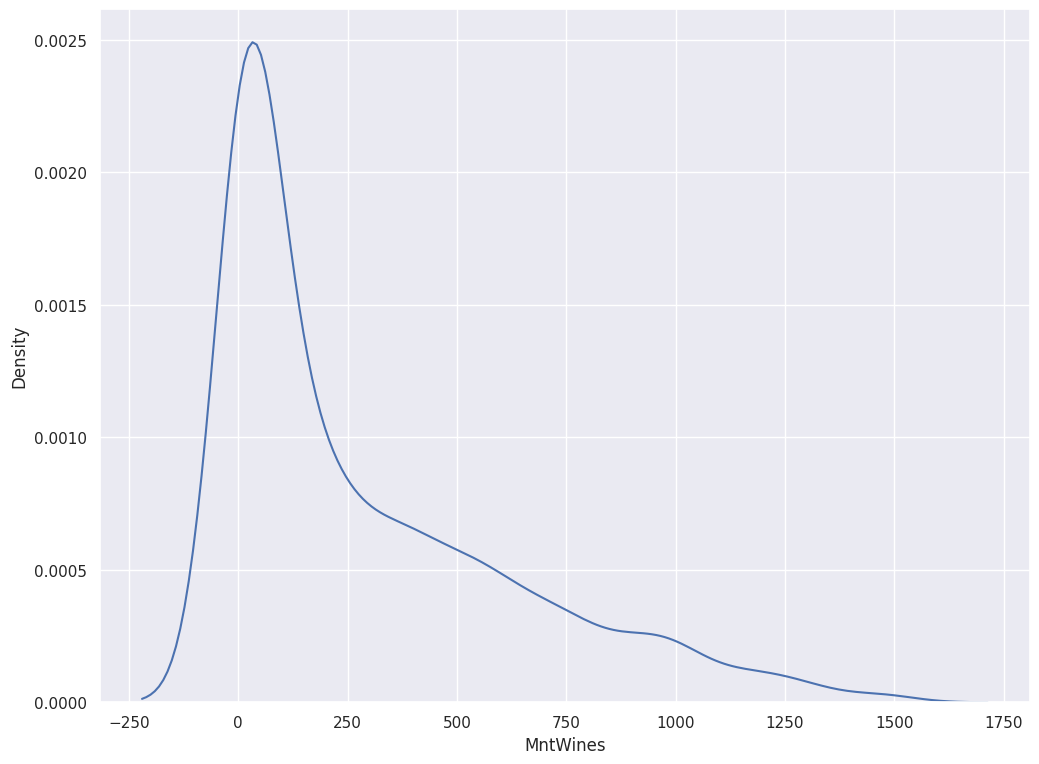

In [30]:
sns.kdeplot(data = df, x="MntWines")

Si nos fijamos en la curva anterior esta se extiende a puntos donde en realidad no tenemos valores, para evitar este comportamiento vamos a añadir el parámetro `cut=0`.

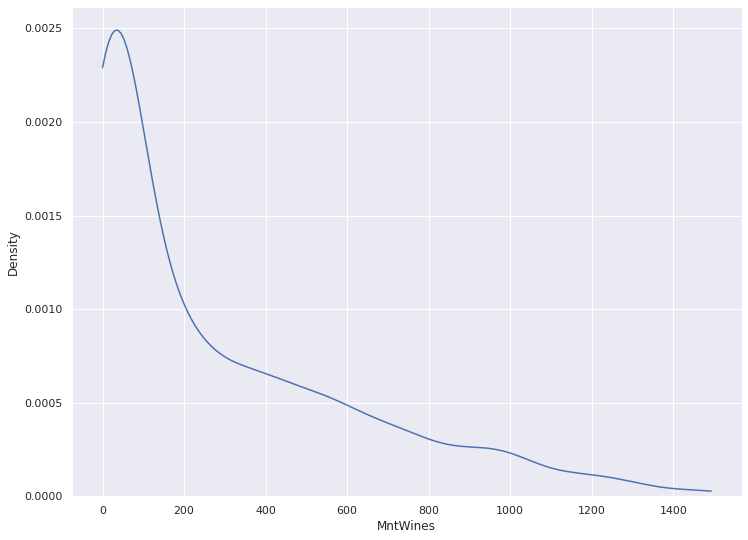

In [ ]:
sns.kdeplot(data = df, x="MntWines",cut=0)

No entraremos en mucho mas detalle sobre los kde plots. Solamente decir que se suelen acompañar de un `sns.rugplot(x=X)` ya que esto nos permite ver donde estan los datos reales y donde han sido suavizados.  También destacar que se puede aplicar una curva de densidad al histograma usando el parámetro `kde=True`

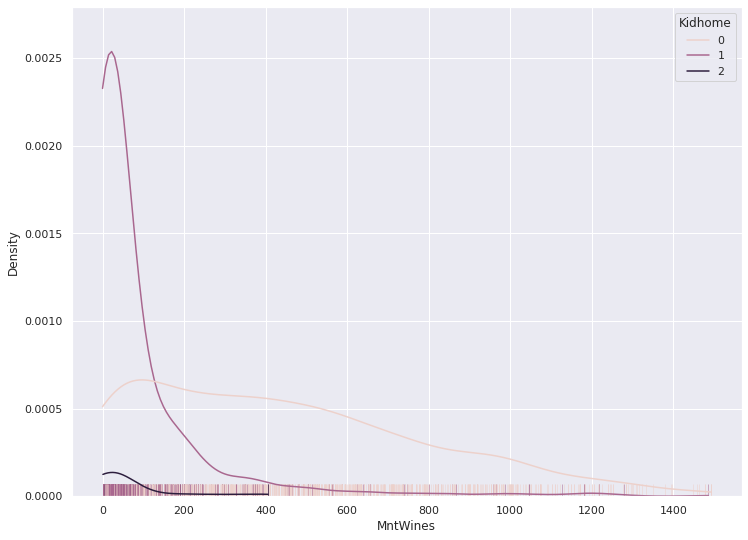

In [ ]:
sns.kdeplot(data = df, x="MntWines",cut=0, hue="Kidhome")
sns.rugplot(data = df, x="MntWines", hue="Kidhome" ,alpha=0.5)

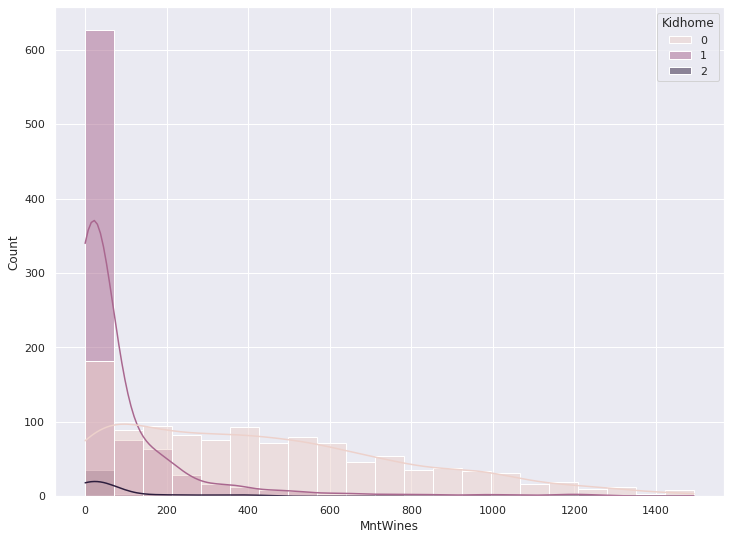

In [ ]:
sns.histplot(data = df, x="MntWines" ,hue="Kidhome",kde=True)

#### Ejercicio 4

**Queremos averiguar la función densidad de los hábitos de compra de nuestros clientes y la de sus rentas. Por ello representamos gráficamente las funciones densidad de `MntMeatProducts` e `Income`. Asegurate de que la curva no se extienda a valores irreales y prueba diferentes valores de `hue` y `multiple`.
[Posibles parámetros](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)**

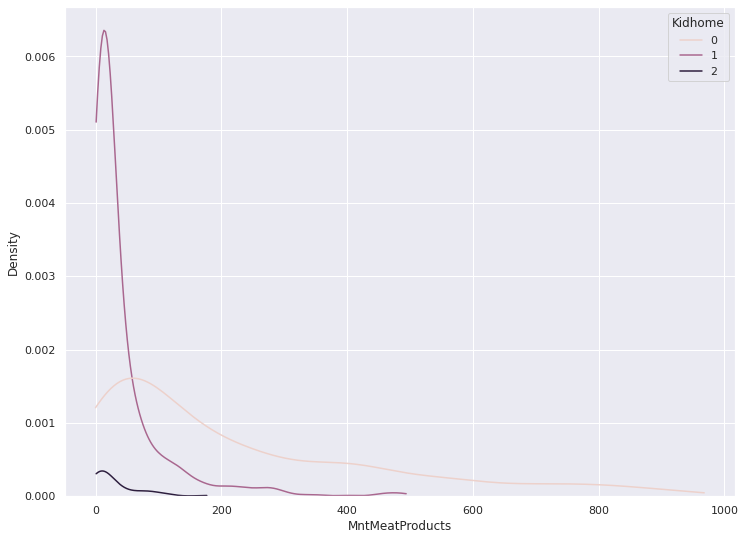

In [ ]:
#INSERTA AQUÍ TU CÓDGIO.


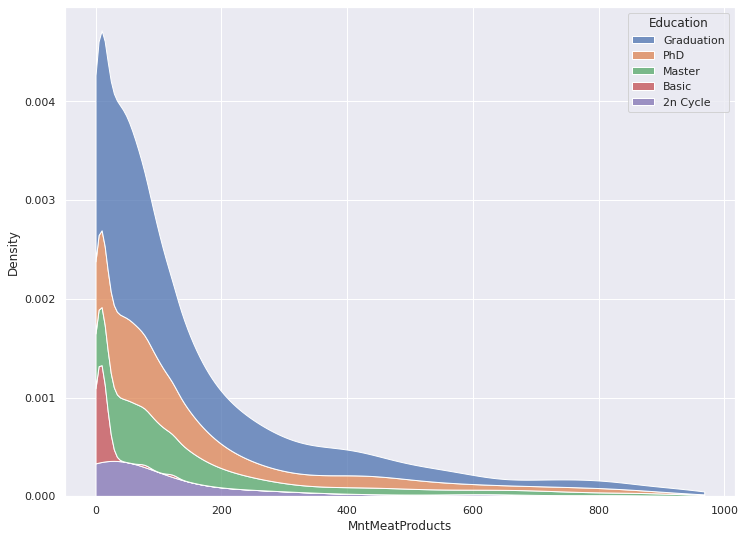

In [ ]:
#multiple{{“layer”, “stack”, “fill”}}
sns.kdeplot(data = df, x="MntMeatProducts",cut=0, hue="Education", multiple="stack")

### Barplot

Un Barplot, o gráfico de barras, es una forma de presentar frecuencias (contar) de variables categóricas. Se podría argumentar que es prácticamente un histograma para variables continuas.

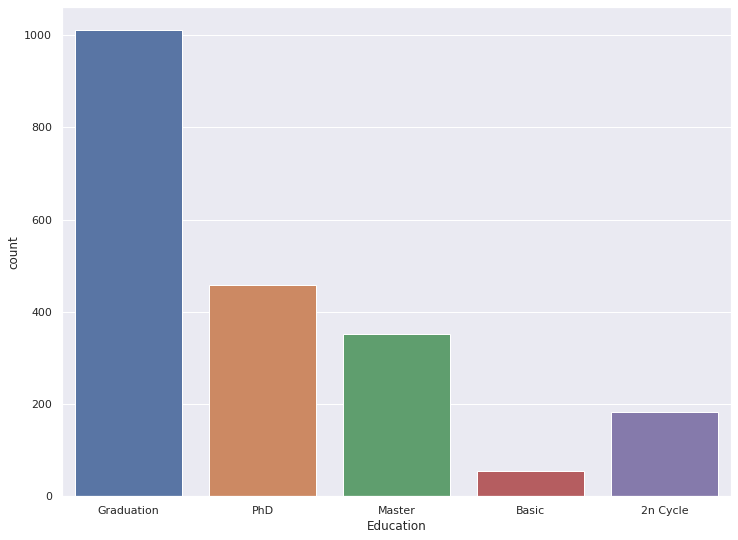

In [ ]:
sns.countplot(data=df, x="Education")

Útil para mostrar la cantidad de personas en cada grupo, pero sin mucha complicación. Aprovechamos esta sencillez para hacer un inciso antes del ejercicio.

## Varios gráficos en una misma figura.


Las gráficas generadas por matplotlib, y por tanto las de seaborn, tienen una estructura de figura, ejes, gráfico, etc. ordenado en capas (Backend, Artist, Scripting). No es precisamente sencillo y por la densidad de este curso no creemos que tenga cabida. Aún así os presentamos este [artículo](https://realpython.com/python-matplotlib-guide/#the-matplotlib-object-hierarchy) para la mentes curiosa.

Volviendo al tema, digamos que queremos representar dos gráficos de barras uno al lado del otro, quizas exista cierta correlación entre ellos o quizás simplemente nos apetezca. Sea como fuese veamos como se haría:

Primero nos debemos crear los ejes, el marco donde después irá cada gráfico por así decirlo:

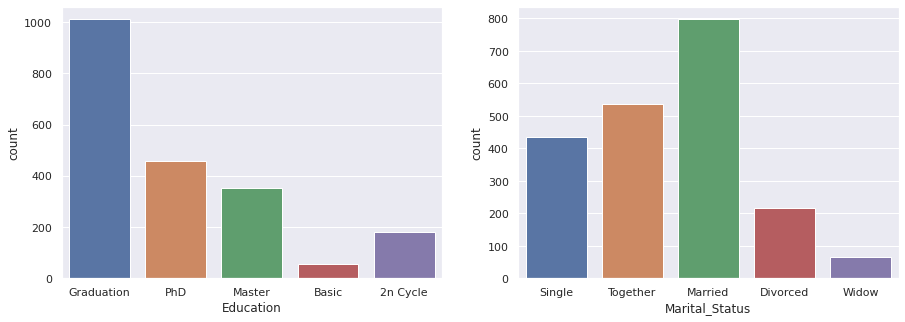

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=df, x="Education",ax=axes[0])
sns.countplot(data=df, x="Marital_Status", ax=axes[1])

Una vez tenemos los ejes insertamos las gráficas, cada una en un eje utilizando el parámetro `ax`. Si nos fijamos parece ser que hay la misma cantidad de personas graduadas que casadas, pero si nos fijamos en los ejes eso claramente no es así. Si para el eje Y trabajamos con la misma variable (contar por ejemplo) podemos fijarla.

Text(0, 0.5, 'Frecuencia')

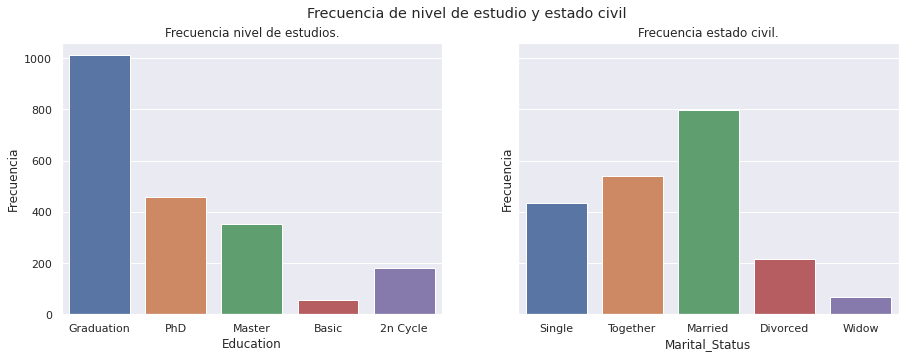

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Frecuencia de nivel de estudio y estado civil')

subfig1=sns.countplot(data=df, x="Education",ax=axes[0])
subfig1.set_title("Frecuencia nivel de estudios.")
subfig1.set_ylabel("Frecuencia")
subfig2=sns.countplot(data=df, x="Marital_Status", ax=axes[1])
subfig2.set_title("Frecuencia estado civil.")
subfig2.set_ylabel("Frecuencia")

#### Ejercicio 5

**Queremos saber la cantidad de hijos que tienen nuestros clientes. Representa gráficamente el número de clientes con hijos jovenes y niños (En una misma figura dos gráficas). ***

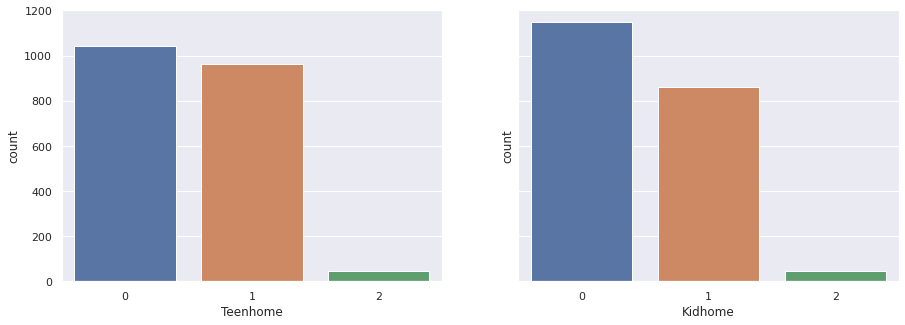

In [ ]:
#INSERTA AQUÍ TU CÓDIGO


**Representa también el número de clientes según los hijos totales (En una misma figura junto las otras 2)
(pista: Crea una nueva columna sumando niños y jovenes). Asegurate de ponerle título a todo.**

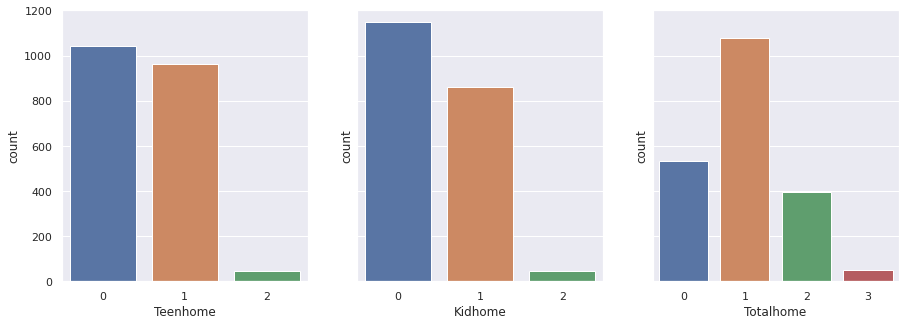

In [ ]:
#INSERTA AQUÍ TU CÓDIGO


## Graficos de composiciones

Los gráficos de composición explican que porcentaje del total pertenece a cada categoría. Si hemos hecho los ejercicios anteriores recordaremos un ejemplo de este tipo de gráficos:

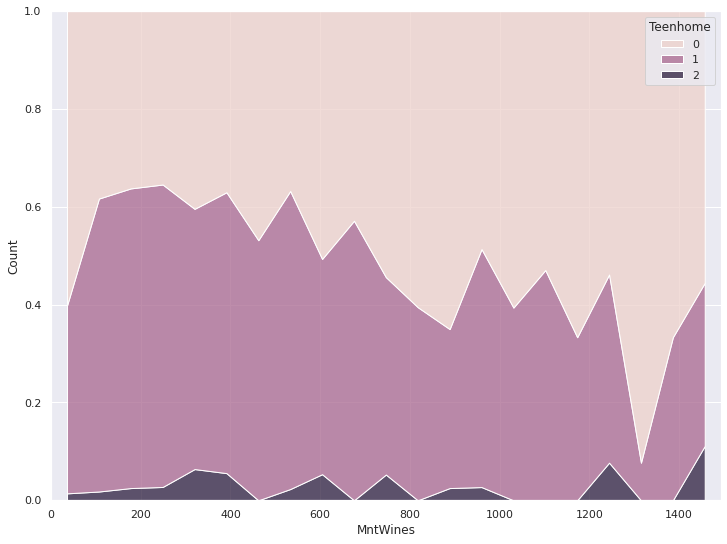

In [ ]:
sns.histplot(data = df, x="MntWines",hue="Teenhome", element="poly", multiple="fill")

Este gráfico explica el porcentaje de familias que tienen cero, uno o dos niños según la cantidad de vino que compran. Normalmente este tipo de gráficos se utilizan para explicar el cambio de las proporciones en función del tiempo, pero para otras variables continuas también se puede realizar perfectamente.

De no tener una variable continua también podríamos realizar un histplot pero en este caso el parámatro `element="poly"`. En lugar de esto deberíamos añadir un parámetro `shrink`.

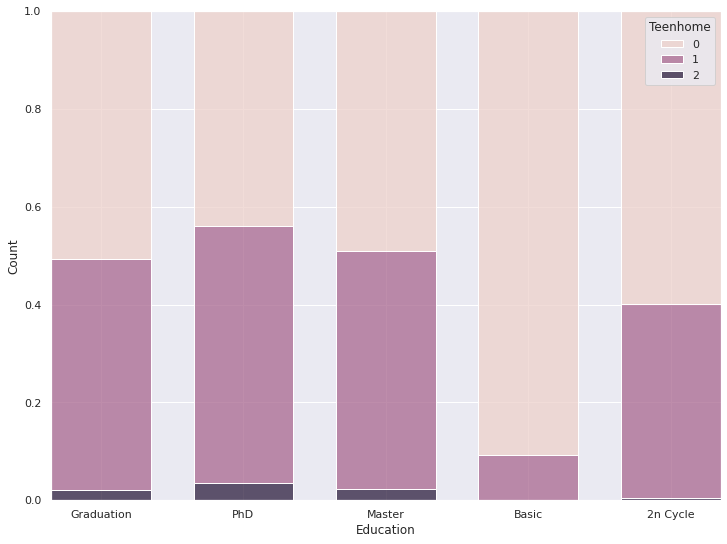

In [ ]:
sns.histplot(data = df, x="Education",hue="Teenhome", multiple="fill", shrink=.7)

Otro gráfico muy común para expresar las proporciones de una variable categórica suelen ser los pie charts (gráfico de pastel o circular):

In [ ]:
count=df.groupby("Teenhome").size()
total=count.sum()
percent= count/total *100

Text(0.5, 1.0, 'Porcentaje clientes según número de hijos.')

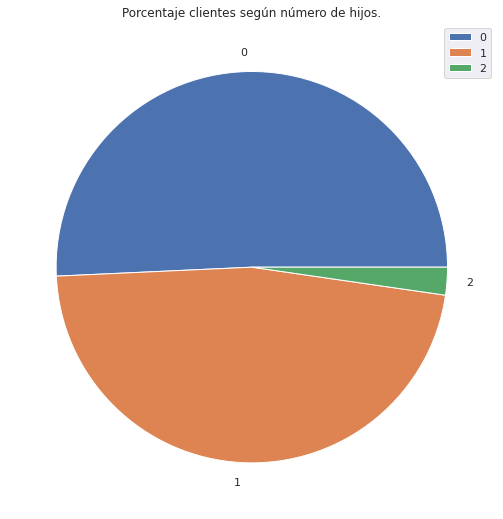

In [ ]:
fig=plt.pie(x=percent,labels=percent.keys())
plt.legend()
plt.title("Porcentaje clientes según número de hijos.")

#### Ejercicio 6

**¿La proporcion de hijos se ha mantenido con los años? Responde la pregunta con dos gráficas que muestren la proporción de niños y jovenes según la fecha de nacimiento del cliente. Realiza otra con el total. Muestra las 3 gráficas en una misma figura**


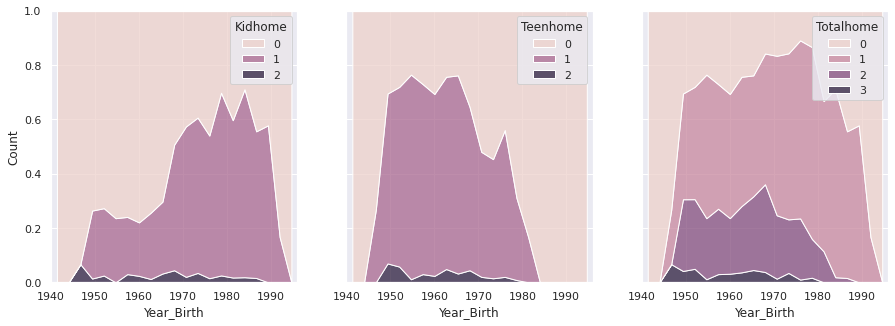

In [ ]:
#INSERTA AQUÍ TU CÓDIGO


#### Ejercicio 7

**Explica mediante dos gráficos circulares las variables Estudios y Estado civil**

In [ ]:
#INSERTA AQUÍ TU CÓDIGO



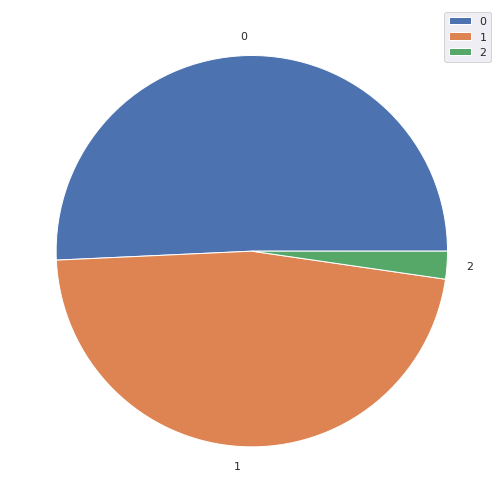

In [ ]:
#INSERTA AQUÍ TU CÓDIGO



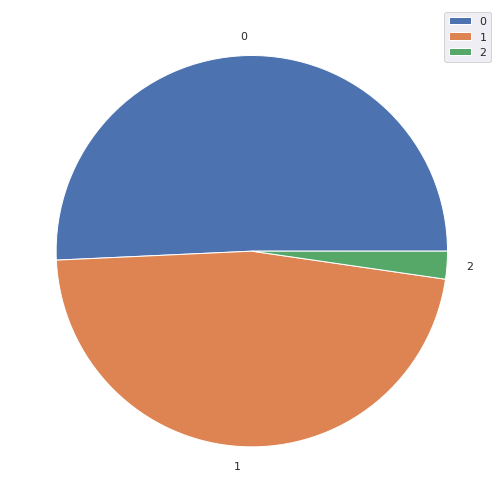

In [ ]:
#INSERTA AQUÍ TU CÓDIGO



##  Gráficos de comparación

Los gráficos de comparación se podría decir que es un campo algo más confuso. En realidad en la mayoría de gráficos anteriores hemos comparado variables por lo que podrían estar perfectamente en esta categoría. Aún así, veamos algunos de los gráficos más importantes de esta sección.

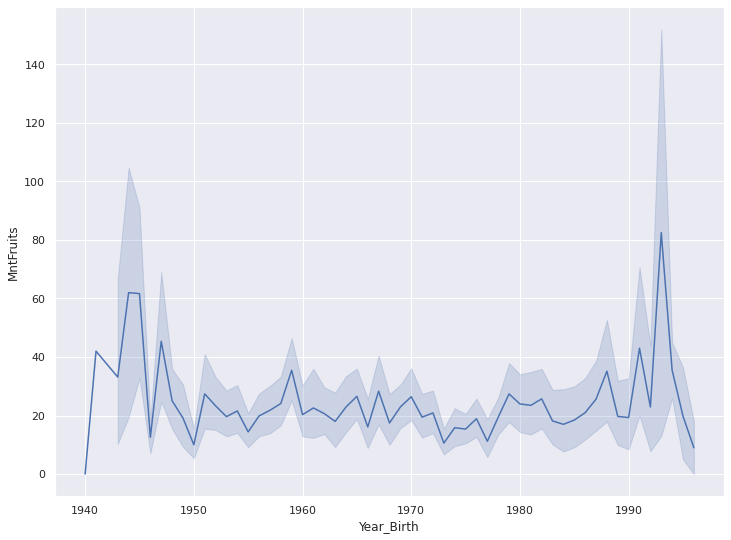

In [ ]:
sns.lineplot(data=df, x="Year_Birth",y="MntFruits")

En el gráfico anterior se muestra una linea de un color mas oscuro (la media) y un rango mas claro, el rango intercuartílico.

Junto a este podemos representar más lineas, ya sea haciendo una división por color como o haciendo varias gráficas.

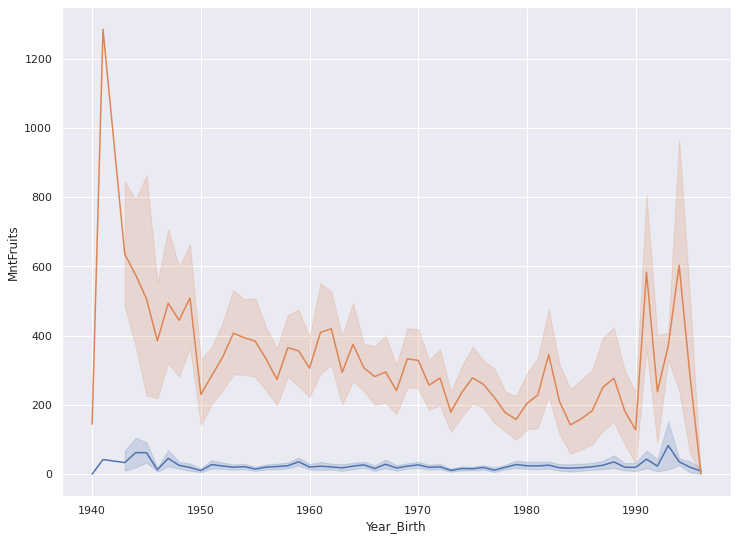

In [ ]:
sns.lineplot(data=df, x="Year_Birth",y="MntFruits")
sns.lineplot(data=df, x="Year_Birth",y="MntWines")

### Ejercicio 8

**¿Que tipo de producto tiene mas ventas según la edad?
 Usa lineplots de los productos.**

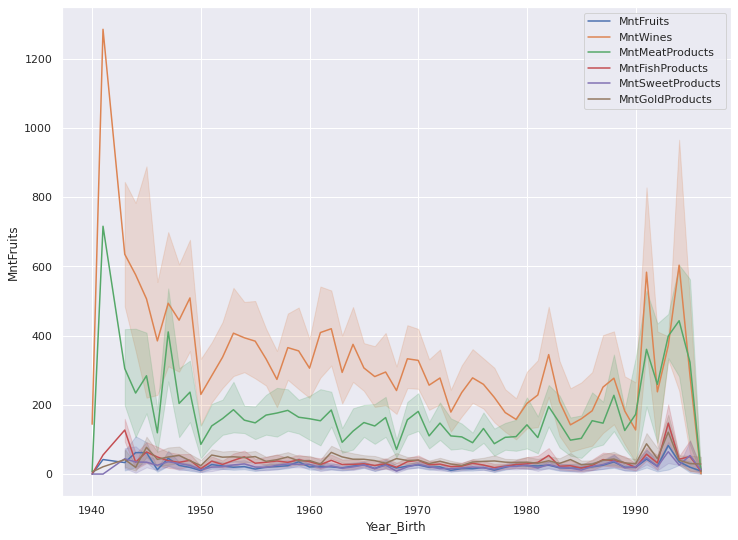

In [ ]:
#INSERTE AQUÍ SU CÓDIGO



**¿Qué plataforma de compra tiene más popularidad según la edad?**

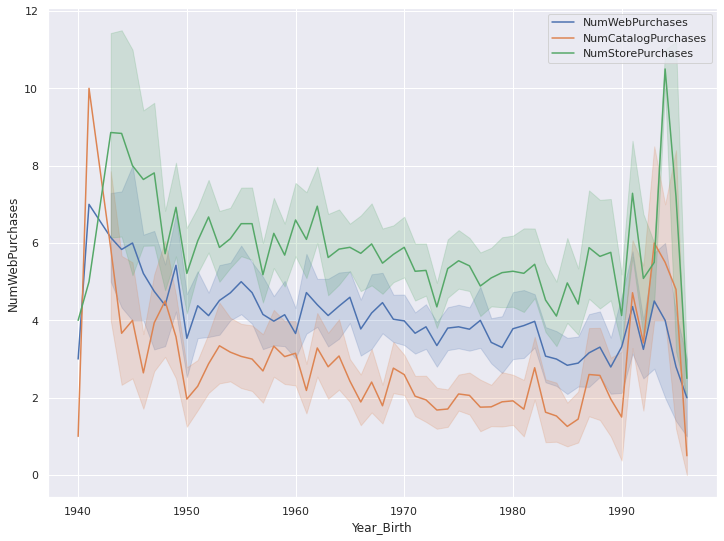

In [ ]:
#INSERTE AQUÍ SU CÓDIGO
